In [4]:
!pip install tensorboard==2.1.0
!pip install tensorlayer==2.2.1
!pip install tensorflow-estimator==2.1.0
!pip install tensorflow==2.1.0
!pip install tensorflow_hub==0.7.0
!pip install h5py
!pip install pyyaml
!pip list

  Using cached https://files.pythonhosted.org/packages/40/23/53ffe290341cd0855d595b0a2e7485932f473798af173bbe3a584b99bb06/tensorboard-2.1.0-py3-none-any.whl
     |████████████████████████████████| 92kB 1.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/1a/53/9243c600e047bd4c3df9e69cfabc1e8004a82cac2e0c484580a78a94ba2a/absl-py-0.9.0.tar.gz
     |████████████████████████████████| 2.5MB 1.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/4c/25/c057a298635d08d087a20f51ff4287d821814208ebb045d84ea65535b3e3/protobuf-3.11.3-cp37-cp37m-macosx_10_9_x86_64.whl
     |████████████████████████████████| 81kB 3.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/7b/b8/88def36e74bee9fce511c9519571f4e485e890093ab7442284f4ffaef60b/google_auth_oauthlib-0.4.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/02/e5/38518af393f7c214357079ce67a317307936896e961e35450b70fad2a9cf/rsa-4.0-py2.py3-none-any.whl
  Using cac

  Using cached https://files.pythonhosted.org/packages/eb/a0/19119d8b7c05be49baf6c593f11c432d571b70d805f2fe94c0585e55e4c8/python_utils-2.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/18/90/b77c328a1304437ab1310b463e533fa7689f4bfc41549593056d812fab8e/tensorflow_estimator-2.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/35/55/a0dbd642e68e68f3e309d1413abdc0a7aa7e1534c79c0fc2501defb864ac/tensorflow-2.1.0-cp37-cp37m-macosx_10_11_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c3/fd/1e86bc4837cc9a3a5faf3db9b1854aa04ad35b5f381f9648fbe81a6f94e4/google_pasta-0.1.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b8/83/755bd5324777875e9dff19c2e59daec837d0378c09196634524a3d7269ac/opt_einsum-3.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/c3/88/97eef84f48fa04fbd6750e62dcceafba6c63c81b7ac1420856c8dcc0a3f9/astor-0.8.1-py2.py3-none-any.whl
  Using cached https://files.python

  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=3010c09662561d965dfe3b313a6d83a8284557af3cd7e67a329ed60d68f47129
  Stored in directory: /Users/benjamin.jones/Library/Caches/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4832 sha256=15f9829e5c3c91dc5889d03b56711e6280e10cce63c7a0062c7319d9d5131df7
  Stored in directory: /Users/benjamin.jones/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built opt-einsum gast termcolor
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1
  Using cached https://files.pythonhosted.org/packages/00/0e/a91780d07592b1abf9c91344ce459472cc19db3b67fdf3a61dca6ebb2f5c/tensorflow_hub-0.7.0-py2.py3-none-any.whl
Package                            Version  
---------------------------------- ---------
absl-py              

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub

In [6]:
# for plotting images (optional)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [7]:
# getting data

base_dir = '/Users/benjamin.jones/Desktop/CatDog2'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats = os.path.join(train_dir, 'cats')
train_dogs = os.path.join(train_dir, 'dogs')
validation_cats = os.path.join(validation_dir, 'cats')
validation_dogs = os.path.join(validation_dir, 'dogs')

num_cats_tr = len(os.listdir(train_cats))
num_dogs_tr = len(os.listdir(train_dogs))
num_cats_val = len(os.listdir(validation_cats))
num_dogs_val = len(os.listdir(validation_dogs))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

BATCH_SIZE = 32
IMG_SHAPE = 150 # match image dimension to mobile net input

In [8]:
#generators

#prevent memorization
train_image_generator = ImageDataGenerator(
    rescale=1./255,#turning from color images to grayscale
    #random transformations each time image is generated to prevent memorization
    rotation_range=40,#randomly rotate degrees
    width_shift_range=0.2, #randomly shift left/right
    height_shift_range=0.2, #randomly hift up/down
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    ) 

validation_image_generator = ImageDataGenerator(
    rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary') #binary cause either cat or dog

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')
#2000 training images
#1000 testing images


Found 25000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


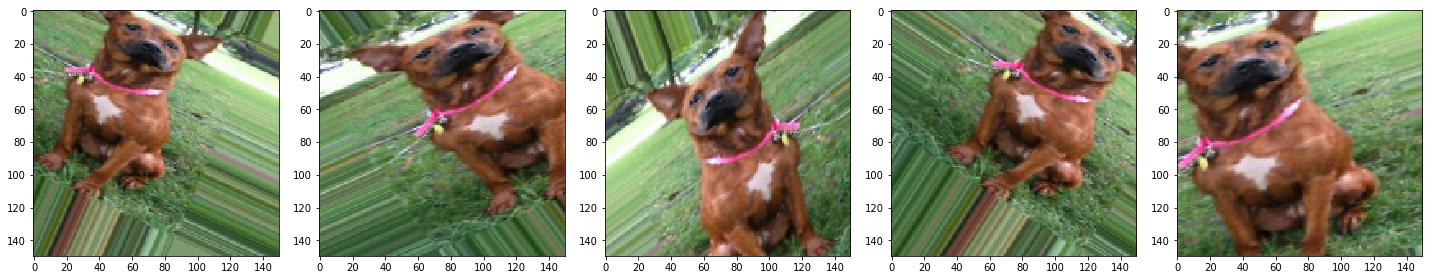

In [7]:
#plot image test [batch][image list][image]
plotImages([train_data_gen[0][0][0] for i in range(5)])
#should now see 5 slightly different variations of the same image, due to the random transformations above

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)), #3 image channels, RBG
    tf.keras.layers.MaxPooling2D(2,2),     
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),   
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2), 
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5), #randomly turn off 1/2 of neurons so model is more robust and doesn't overfit as easily
    
    tf.keras.layers.Flatten(), #turn from 3D to 2D
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(2, activation='softmax') #[0,1] or [1,0] for doggness or catness                     
    ])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
#save the model at this location after every epoch
checkpoint_path = '/Users/benjamin.jones/Desktop/CatDog2/Checkpoints/cp-{epoch:04d}' #unique name for each saved checkpoint (after every 1 epoch)
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only=True,
                                                verbose=1,
                                                save_freq='epoch' #save after every epoch
                                                )
latest = tf.train.latest_checkpoint(checkpoint_dir) #returns file name of latest checkpoint
print(latest)

/Users/benjamin.jones/Desktop/CatDog2/Checkpoints/cp-0008


In [11]:
#Optional: loading a saved model
model.load_weights(latest) #loads weights of the most reccent saved model (adjust if latest not desired)

In [8]:
#begin or resume training

EPOCHS = 8 #too many epochs leads overfitted - reduced epochs (faster run time as well) and added random transformations
#you can tell it's starting to overfit when the training accuracy increases but validation accuracy decreases
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val/float(BATCH_SIZE))),
    callbacks=[cp_callback]
    )


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 782 steps, validate for 32 steps
Epoch 1/8
781/782 [============================>.] - ETA: 0s - loss: 0.5750 - accuracy: 0.7052
Epoch 00001: saving model to /Users/benjamin.jones/Desktop/CatDog2/Checkpoints/cp-0001
782/782 [==============================] - 380s 486ms/step - loss: 0.5750 - accuracy: 0.7051 - val_loss: 0.5096 - val_accuracy: 0.7390
Epoch 2/8
781/782 [============================>.] - ETA: 0s - loss: 0.5253 - accuracy: 0.7410
Epoch 00002: saving model to /Users/benjamin.jones/Desktop/CatDog2/Checkpoints/cp-0002
782/782 [==============================] - 374s 478ms/step - loss: 0.5252 - accuracy: 0.7410 - val_loss: 0.3951 - val_accuracy: 0.8390
Epoch 3/8
781/782 [============================>.] - ETA: 0s - loss: 0.4801 - accuracy: 0.7763
Epoch 00003: saving model to /Users/benjamin.jones/Desktop/CatDog2/Checkpoints/cp-0003
782/782 [======

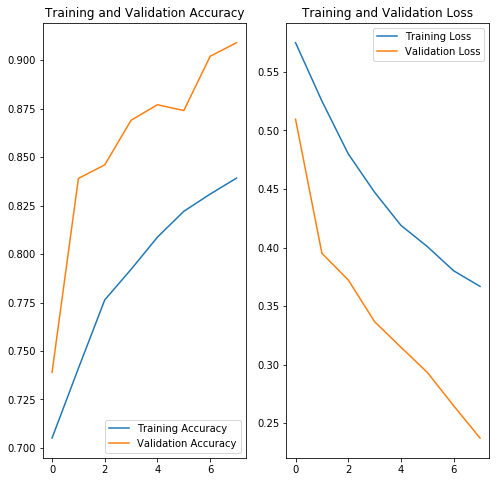

In [10]:
#optional, visual analysis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 28 images belonging to 1 classes.


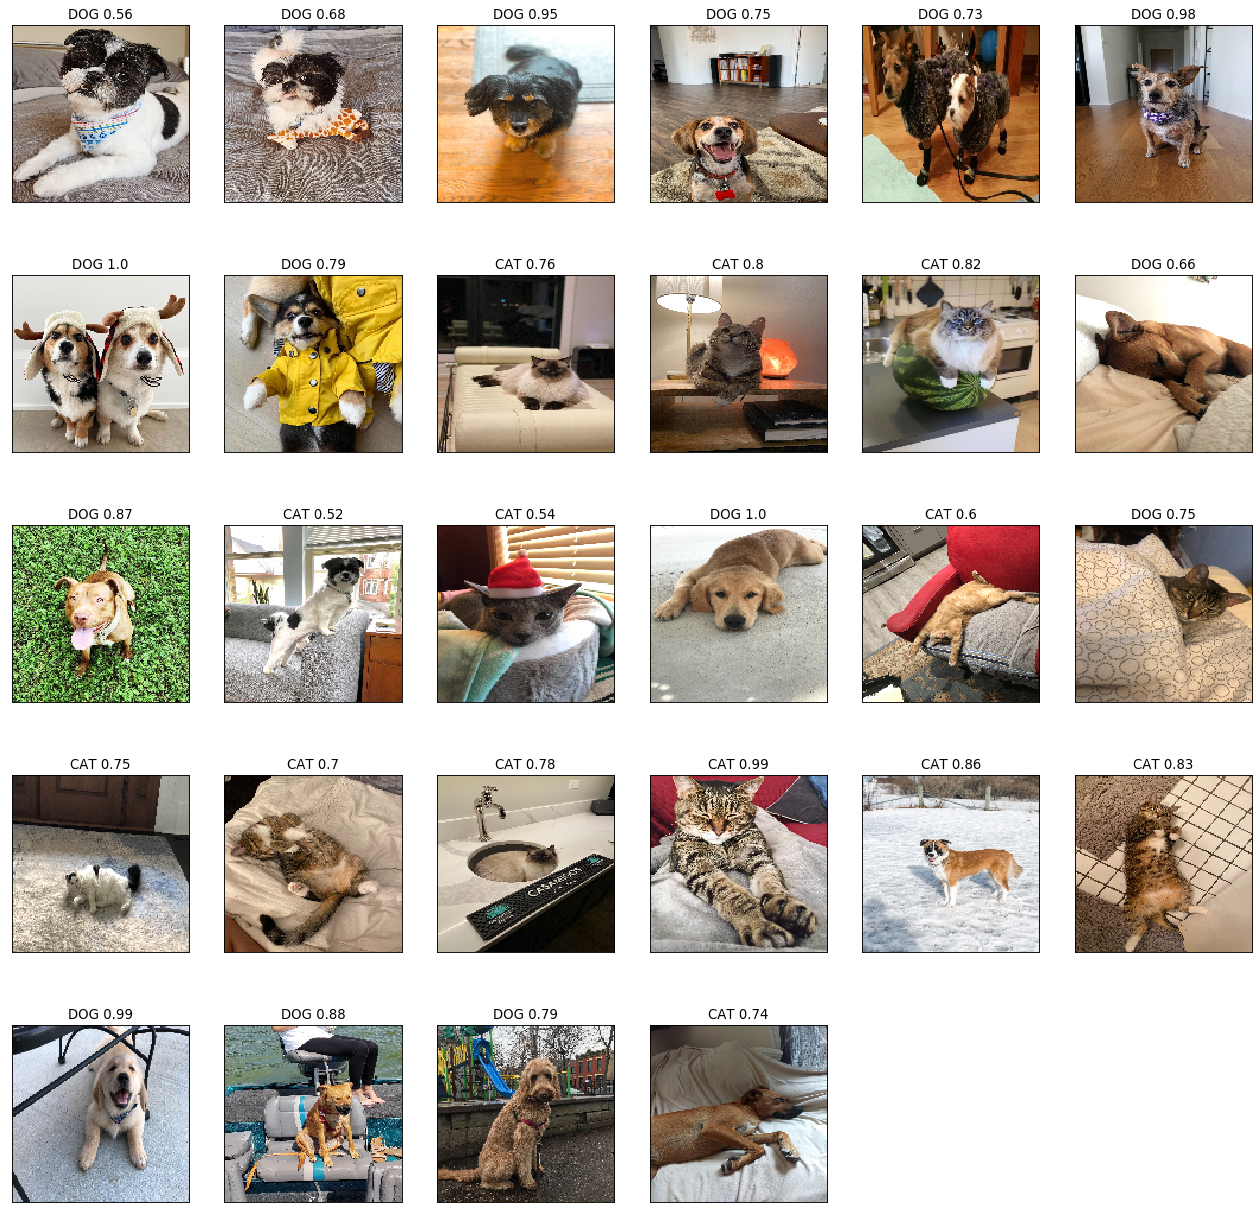

In [14]:
#predict and visually shown 

wild_dir = os.path.join(base_dir, 'wild')
wild_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=wild_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

wild_output = model.predict_generator(wild_data_gen,
                        #steps=None, #if unspecified, will use the len(generator) as a number of steps.
                        callbacks=None,
                        max_queue_size=10,
                        workers=1,
                        use_multiprocessing=False,
                        verbose=0)

fig=plt.figure(figsize=(20, 20), dpi= 80, facecolor='w', edgecolor='k')
for i in range(len(wild_output)):
    y = fig.add_subplot(5,6,i+1)
    
    # cat: [1,0]
    # dog: [0,1]
    
    if np.argmax(wild_output[i]) == 1: str_label='DOG'+ ' ' + str(round(wild_output[i][1],2))
    else: str_label='CAT'+ ' ' + str(round(wild_output[i][0],2))
        
    y.imshow(wild_data_gen[0][0][i])
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [12]:
#optional, save ENTIRE model (not just the weights) - meaning can be run without any original code
model.save('catdogclassifier.h5') #saves in local directory

In [13]:
#load a saved, ENTIRE model
new_model = tf.keras.models.load_model('catdogclassifier.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1